In [106]:
import numpy as np
import math as math
import scipy as sc
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk

# Fáza 3
Autori: Jakub Smorada, Adrian Szacsko
Podiel práce: 50 % / 50 %

Na začiatku je potrebné načítať dáta, ktoré sme uložili na konci fázy 2.

In [107]:
test_dataset = pd.read_csv("faza2/test_dataset.csv", delimiter=",")
train_dataset = pd.read_csv("faza2/train_dataset.csv", delimiter=",")

test_dataset.drop(test_dataset.columns[0], axis=1, inplace=True)
train_dataset.drop(train_dataset.columns[0], axis=1, inplace=True)

Vyberieme len tie atribúty, ktoré majú najväčší vplyv na indikator.

In [108]:
train_attributes_dataset = train_dataset[['trombocyty','erytrocyty','alt','hematokrit','leukocyty', 'indicator']].copy()
test_attributes_dataset = test_dataset[['trombocyty','erytrocyty','alt','hematokrit','leukocyty', 'indicator']].copy()
train_attributes_dataset

,trombocyty,erytrocyty,alt,hematokrit,leukocyty,indicator
0,0.000000,0.657410,0.590051,0.124012,0.235670,0.0
1,0.472369,0.783140,0.756626,0.916138,0.979337,0.0
2,0.000000,0.758214,0.765718,0.618083,0.534911,0.0
3,0.520432,0.496035,0.358712,0.899930,0.451250,0.0
4,0.057209,0.578113,0.505168,0.612411,0.582834,0.0
...,...,...,...,...,...,...
7765,0.000000,0.928649,0.926709,0.605019,0.800762,0.0
7766,0.770651,0.490583,0.483083,0.462006,0.570330,1.0
7767,0.606216,0.793698,0.777088,0.000000,0.286733,1.0
7768,0.655724,0.680117,0.607614,0.065900,0.921863,1.0


## 1. Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

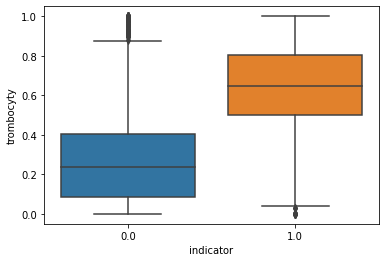

In [109]:
sns.boxplot(data=train_attributes_dataset, x="indicator", y="trombocyty")

In [110]:
from quick_sort import quickSort
from math import ceil

def oneR_model(dataset:pd.DataFrame, attribute):
    rows = len(dataset)
    percent = ceil(rows*0.3)
    min = 0
    max = 0
    zero_array = []
    one_array = []
    for i in range(rows):
        if dataset["indicator"][i] == 0:
            zero_array.append(dataset[attribute][i])
        else:
            one_array.append(dataset[attribute][i])

    quickSort(one_array, 0, len(one_array)-1)
    quickSort(zero_array, 0, len(zero_array)-1)
    zero_array = zero_array[::-1]

    if percent > len(one_array):
        percent = len(one_array)
    if percent > len(zero_array):
        percent = len(zero_array)

    for i in range(percent):
        min += one_array[i]
        max += zero_array[i]

    min = min/percent
    max = max/percent

    threshold = (min+max)/2
    return threshold


def oneR(model, dataset_attr):
    predict = []
    for i in dataset_attr:
        if i > model:
            predict.append(1)
        else:
            predict.append(0)
    return predict


Trombocyty, Erytrocyty, Alt, Hematokrit a Leukocyty

In [111]:
model = oneR_model(train_attributes_dataset, "trombocyty")
oneR_prediction = oneR(model, train_attributes_dataset["trombocyty"])

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



print("Precision:",accuracy_score(train_attributes_dataset["indicator"], oneR_prediction))
print("Precision:",precision_score(train_attributes_dataset["indicator"], oneR_prediction, average='macro'))
print("Precision:",recall_score(train_attributes_dataset["indicator"], oneR_prediction, average='macro'))

Precision: 0.8223938223938224
Precision: 0.8083146067415731
Precision: 0.8023544689740839
